In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
import os

import pandas as pd

import vendee_globe as vg

import constants as c

In [34]:
# load and prep race data 
df_race = pd.read_parquet(c.race_2020_path)
df_race["skipper"] = df_race["skipper"].replace('Arnaud Boissieres', 'Arnaud Boissières').replace('Sam Davies', 'Samantha Davies')
df_race.shape

(15277, 24)

In [35]:
# load and prep web data
if os.path.exists(c.web_2020_path):
    df_web = pd.read_parquet(c.web_2020_path)
else:
    df_web = vg.load_web_data_2020()
    df_web.to_parquet(c.web_2020_path)

df_web = vg.data_prep_web(df_web)
df_web.shape

(33, 17)

In [36]:
# merge all 3 dataframes
df = pd.merge(df_race, df_web, on="skipper", how="left")
df.shape

(15277, 40)

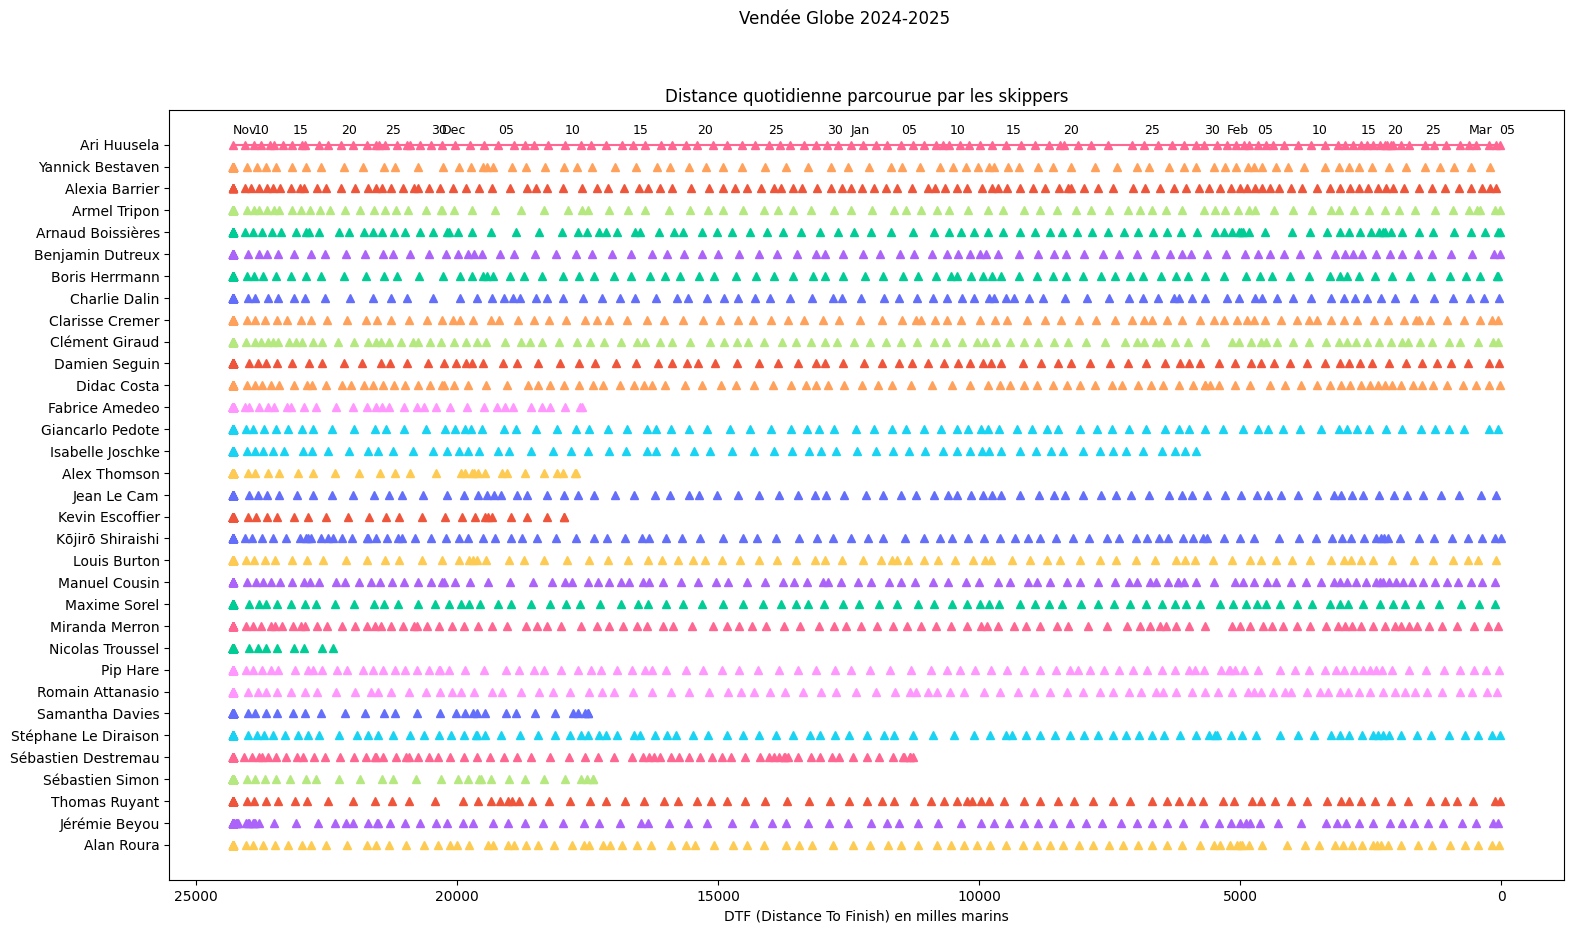

In [37]:
vg.show_race(df_race)

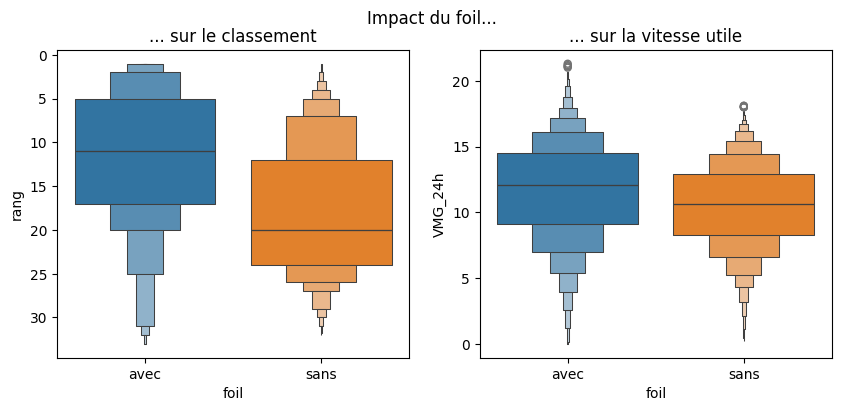

In [38]:
vg.impact_foil(df)

In [39]:
vg.interact(df)

interactive(children=(Dropdown(description='Colonne :', index=13, options=('rang', 'latitude', 'longitude', 'c…

In [40]:
vg.show_globe(df_race, 0, 10)

In [41]:
vg.show_speed(df_race)

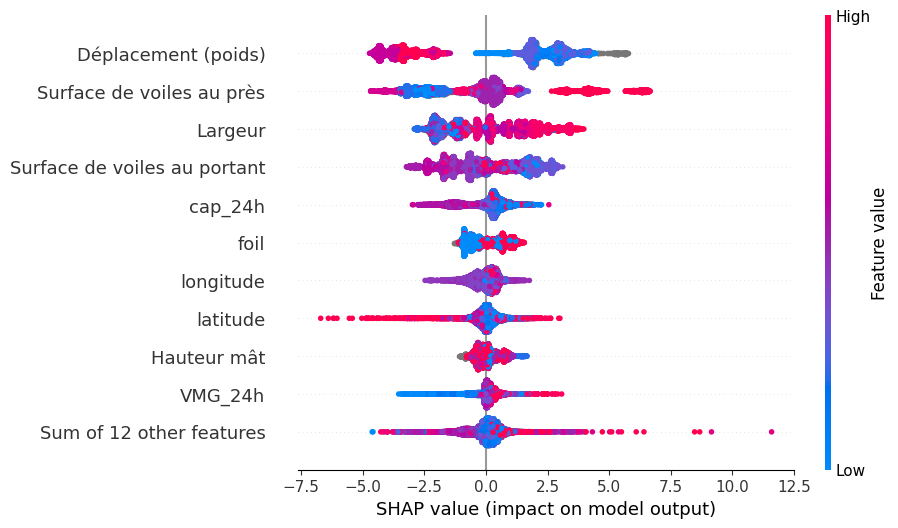

In [42]:
vg.show_shap_values(df)